# SaudiNewsNet

In [ ]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

## Handling json files

In [ ]:
data_folder = 'dataset'
all_articles = []

In [ ]:
for file in os.listdir(data_folder):
    if file.endswith('.json'):
        with open(os.path.join(data_folder, file), 'r', encoding='utf-8') as f:
            articles = json.load(f)
            all_articles.extend(articles)


In [ ]:
# Convert to DataFrame
df1 = pd.DataFrame(all_articles)

In [ ]:
# Display the first few rows of the dataset to understand its structure
df1.head(5)

In [ ]:
df1.to_csv('saudinewsnet.csv', index=False)

## EDA

In [ ]:
path = "/content/drive/MyDrive/Capstone Project/Dataset/saudinewsnet.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head(5)

,source,url,date_extracted,title,author,content
0,aawsat,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,لندن: رنيم حنوش,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...
1,aawsat,http://aawsat.com/home/article/410801/الرئيس-ه...,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن,لندن: «الشرق الأوسط أونلاين»,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...
2,aawsat,http://aawsat.com/home/article/410796/مجلس-الأ...,2015-07-21 02:51:35,مجلس الأمن يصادق على «الاتفاق النووي».. وإيران...,لندن: «الشرق الأوسط أونلاين»,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...
3,aawsat,http://aawsat.com/home/article/410771/«نيران-ص...,2015-07-21 02:51:37,«نيران صديقة» أميركية تودي بحياة 14 جنديا أفغانيا,لندن: «الشرق الأوسط أونلاين»,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...
4,aawsat,http://aawsat.com/home/article/410751/الخارجية...,2015-07-21 02:51:38,الخارجية الإيطالية: أربعة من مواطنينا مخطوفون ...,لندن: «الشرق الأوسط أونلاين»,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...


In [ ]:
# Preliminary Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31030 entries, 0 to 31029
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          31030 non-null  object
 1   url             31030 non-null  object
 2   date_extracted  31030 non-null  object
 3   title           30963 non-null  object
 4   author          26294 non-null  object
 5   content         30897 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,source,url,date_extracted,title,author,content
count,31030,31030,31030,30963,26294,30897
unique,14,31030,28265,29462,8252,30133
top,alriyadh,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-25 10:02:38,كاريكاتير,«الاقتصادية» من الرياض,
freq,4852,1,3,42,608,189


### Analyzing Missing Data

In [ ]:
df.isnull().sum()

,0
source,0
url,0
date_extracted,0
title,67
author,4736
content,133


In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
missing_percentage


Percentage of missing values in each column:


,0
source,0.000000
url,0.000000
date_extracted,0.000000
title,0.215920
author,15.262649
content,0.428617


### Understand Data Distribution

In [ ]:
# Checking the distribution of the content length
df['content_length'] = df['content'].apply(lambda x: len(str(x)))
print("\nContent Length Statistics:")
print(df['content_length'].describe())


Content Length Statistics:
count    31030.000000
mean      1712.766935
std       1655.297696
min          1.000000
25%        715.000000
50%       1210.000000
75%       2131.000000
max      33687.000000
Name: content_length, dtype: float64


In [ ]:
# Checking the distribution of the title length
df['title_length'] = df['title'].fillna("").apply(lambda x: len(str(x)))
print("\nTitle Length Statistics:")
print(df['title_length'].describe())


Title Length Statistics:
count    31030.000000
mean        47.263874
std         17.240131
min          0.000000
25%         36.000000
50%         48.000000
75%         58.000000
max        181.000000
Name: title_length, dtype: float64


### Analyze Data Source

In [ ]:
print(df.shape)
# total number of unique categories
print("Unique categories:",df['source'].nunique())
df['source'].unique()

(31030, 8)
Unique categories: 14


array(['aawsat', 'aleqtisadiya', 'aljazirah', 'almadina', 'alriyadh',
       'alwatan', 'alweeam', 'alyaum', 'arreyadi', 'okaz', 'sabq',
       '3alyoum', 'was', 'arriyadiyah'], dtype=object)

In [ ]:
# Unique sources and their counts
print("\nUnique sources and their counts:")
print(df['source'].value_counts())


Unique sources and their counts:
source
alriyadh        4852
aljazirah       3690
alyaum          3065
aleqtisadiya    2964
aawsat          2947
okaz            2846
alwatan         2279
almadina        2252
alweeam         2090
3alyoum         2080
sabq            1411
was              369
arreyadi         133
arriyadiyah       52
Name: count, dtype: int64


In [ ]:
# Checking the number of unique authors
print("\nNumber of unique authors:", df['author'].nunique())


Number of unique authors: 8252


### Visualizing Data

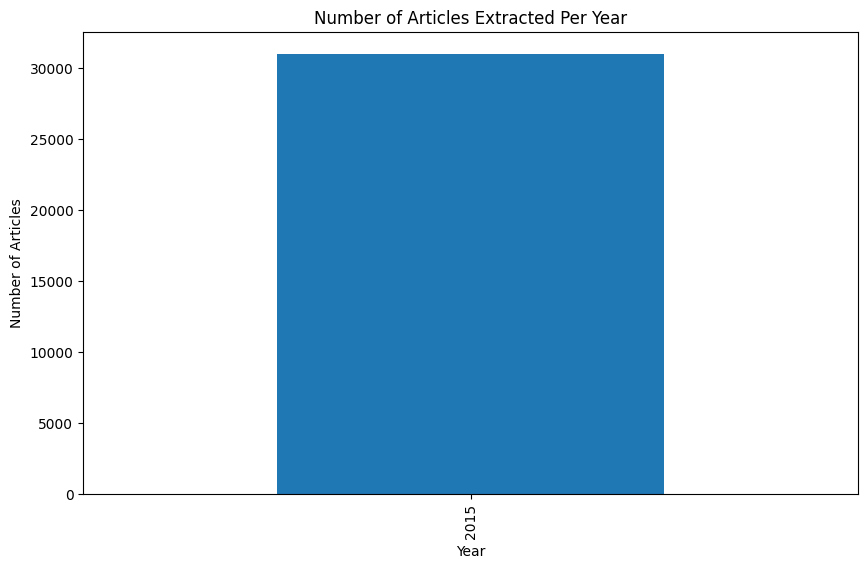

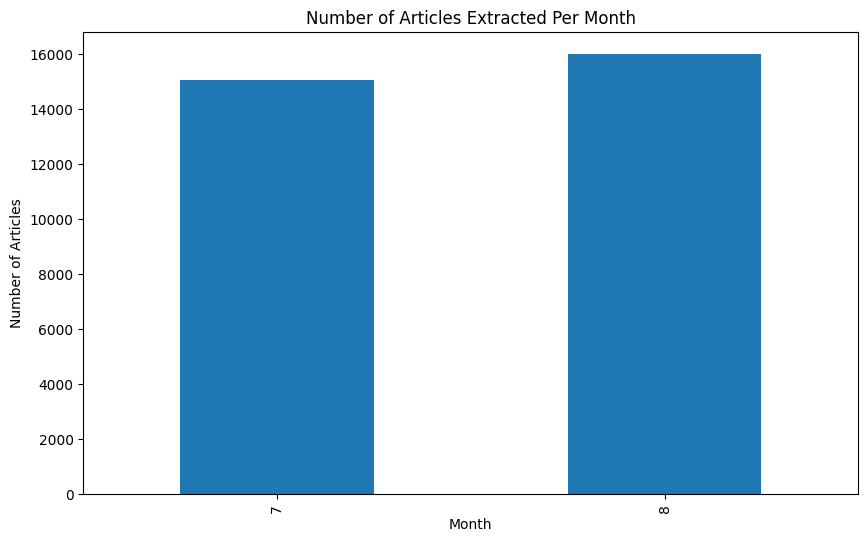

In [ ]:
import matplotlib.pyplot as plt

# Analyzing the 'date_extracted' column
# Convert 'date_extracted' to datetime format
df['date_extracted'] = pd.to_datetime(df['date_extracted'], errors='coerce')

# Extract year and month for further analysis
df['year'] = df['date_extracted'].dt.year
df['month'] = df['date_extracted'].dt.month

# Plotting the distribution of articles by year
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Extracted Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()

# Plotting the distribution of articles by month
plt.figure(figsize=(10, 6))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Articles Extracted Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()

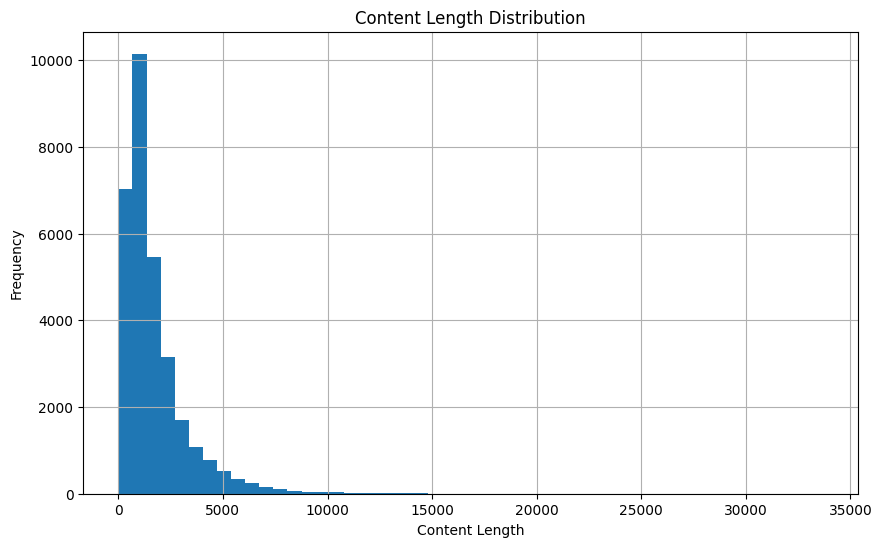

In [ ]:
# Plotting the distribution of content length
plt.figure(figsize=(10, 6))
df['content_length'].hist(bins=50)
plt.title("Content Length Distribution")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.show()


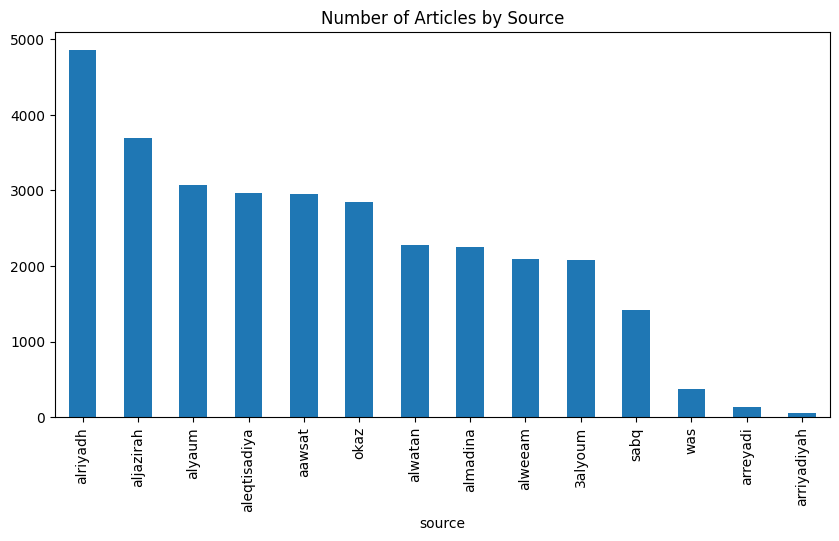

In [ ]:
df['source'].value_counts().plot(kind='bar', figsize=(10, 5), title='Number of Articles by Source')
plt.show()

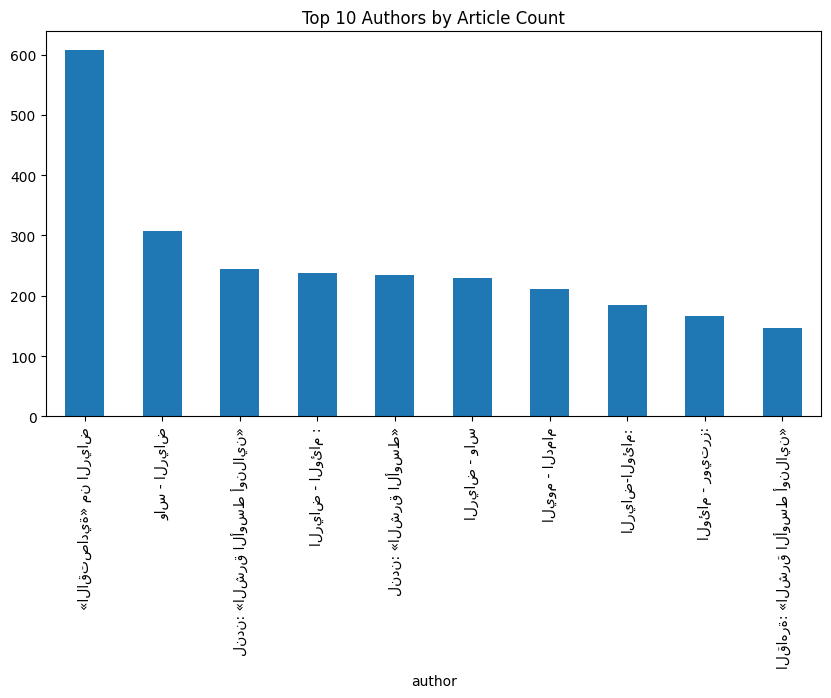

In [ ]:
df['author'].value_counts().head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Authors by Article Count')
plt.show()

### Summary Insights

1 - The dataset consists of 14 unique sources and 8,252 unique authors

2- The columns source, url, and date_extracted have no missing values, while title has around 0.22% missing values, author has about 15.26% missing values, and content has 0.43% missing values.

3- The content length ranges from 1 to 33,687 characters, with an average of approximately 1,720 characters per article.

4- The title length varies from 2 to 181 characters, with an average of about 47 characters.

5- This indicates that the dataset is relatively clean, with only minor issues with missing values in the title and content.

6- the content not labled (no  catogry)


## Catogrization

In [ ]:

# Define Arabic categories and their associated keywords
categories = {
    "سيارات": ["سيارة", "محرك", "مركبة", "طريق"],
    "ترفيه": ["حفلة", "موسيقى", "فيلم", "عرض", "فن"],
    "تمويل": ["بنك", "استثمار", "اقتصاد", "سوق الأسهم", "عملات"],
    "طعام وشراب": ["مطعم", "وصفة", "طعام", "شراب", "طبخ"],
    "صحة": ["صحة", "مرض", "علاج", "مستشفى", "دواء"],
    "أطفال": ["أطفال", "لعب", "مدرسة", "تعليم", "قصص"],
    "أسلوب الحياة": ["موضة", "أناقة", "ديكور", "ملابس"],
    "الشرق الأوسط": ["سوريا", "لبنان", "مصر", "خليج", "إيران"],
    "أفلام": ["سينما", "فيلم", "عرض", "تذاكر"],
    "موسيقى": ["أغنية", "موسيقى", "حفل", "ألبوم"],
    "أخبار": ["خبر", "سياسة", "انتخابات", "صحيفة", "نشرة"],
    "أمريكا الشمالية": ["الولايات المتحدة", "كندا", "أمريكا"],
    "رياضة": ["مباراة", "لاعب", "فريق", "رياضة", "كأس"],
    "سفر": ["سفر", "رحلة", "طائرة", "فنادق", "سياحة"],
    "تلفزيون": ["مسلسل", "برنامج", "تلفزيون", "قناة"],
    "فيديو": ["فيديو", "تصوير", "كاميرا"],
    "طقس": ["طقس", "أمطار", "درجة الحرارة", "جو", "رياح"]
}


In [ ]:
# Function to categorize content based on keywords
def categorize_content(content):
    for category, keywords in categories.items():
        for keyword in keywords:
            if pd.notna(content) and keyword in content:
                return category
    return "غير مصنف"  # Return "غير مصنف" (Uncategorized) if no keywords match

# Apply the categorization function to the content column
df['category'] = df['content'].apply(categorize_content)

# Display the first few rows to check the categorization
print(df[['content', 'category']].head())



                                             content      category
0  حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...        سيارات
1  أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...         ترفيه
2  وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...  الشرق الأوسط
3  قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...        سيارات
4  أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...       تلفزيون


In [ ]:
df

,source,url,date_extracted,title,author,content,content_length,title_length,year,month,category
0,aawsat,http://aawsat.com/home/article/410826/بريطانيا...,2015-07-21 02:51:32,بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى ...,لندن: رنيم حنوش,حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليو...,2555,70,2015,7,سيارات
1,aawsat,http://aawsat.com/home/article/410801/الرئيس-ه...,2015-07-21 02:51:33,الرئيس هادي يعين نايف البكري محافظا لعدن,لندن: «الشرق الأوسط أونلاين»,أصدر الرئيس عبدربه منصور هادي رئيس الجمهورية ا...,1204,40,2015,7,ترفيه
2,aawsat,http://aawsat.com/home/article/410796/مجلس-الأ...,2015-07-21 02:51:35,مجلس الأمن يصادق على «الاتفاق النووي».. وإيران...,لندن: «الشرق الأوسط أونلاين»,وافق مجلس الأمن الدولي، اليوم (الاثنين)، على ا...,698,67,2015,7,الشرق الأوسط
3,aawsat,http://aawsat.com/home/article/410771/«نيران-ص...,2015-07-21 02:51:37,«نيران صديقة» أميركية تودي بحياة 14 جنديا أفغانيا,لندن: «الشرق الأوسط أونلاين»,قال مسؤولون أفغان ان 14 جنديا أفغانيا قتلوا في...,1529,49,2015,7,سيارات
4,aawsat,http://aawsat.com/home/article/410751/الخارجية...,2015-07-21 02:51:38,الخارجية الإيطالية: أربعة من مواطنينا مخطوفون ...,لندن: «الشرق الأوسط أونلاين»,أعلنت وزارة الخارجية الايطالية، اليوم (الاثنين...,699,54,2015,7,تلفزيون
...,...,...,...,...,...,...,...,...,...,...,...
31025,was,http://www.spa.gov.sa/details.php?id=1387081,2015-08-11 18:51:24,عام / وزير الشؤون البلدية يوجه بإنشاء مكاتب لإ...,NaN,الرياض 26 شوال 1436 هـ الموافق 11 اغسطس 2015 ...,1958,69,2015,8,ترفيه
31026,was,http://www.spa.gov.sa/details.php?id=1387080,2015-08-11 18:51:25,عام / هيئة الإغاثة تصف أوضاع اللاجئين الهاربين...,NaN,جدة 26 شوال 1436 هـ الموافق 11 أغسطس 2015 م و...,1829,69,2015,8,سيارات
31027,was,http://www.spa.gov.sa/details.php?id=1387079,2015-08-11 18:51:26,عام / المشرف العام على مركز الملك سلمان للإغاث...,NaN,الرياض 26 شوال 1436 هـ الموافق 11 أغسطس 2015 ...,818,82,2015,8,أخبار
31028,was,http://www.spa.gov.sa/details.php?id=1387078,2015-08-11 18:51:32,رياضي / أخضر الطائرة في مواجهة مرتقبة أمام الج...,NaN,الرياض 26 شوال 1436 هـ الموافق 11 أغسطس 2015 ...,428,50,2015,8,ترفيه


In [ ]:
# Display the counts of each category in the dataset
category_counts = df['category'].value_counts()

# Print each category with the count of articles in it
print("Categories and their article counts:\n")
for category, count in category_counts.items():
    print(f"Category: {category}, Count: {count}")


Categories and their article counts:

Category: ترفيه, Count: 8267
Category: سيارات, Count: 6461
Category: غير مصنف, Count: 2604
Category: أطفال, Count: 2466
Category: تمويل, Count: 2336
Category: صحة, Count: 1852
Category: الشرق الأوسط, Count: 1725
Category: أخبار, Count: 1378
Category: طقس, Count: 1046
Category: رياضة, Count: 806
Category: سفر, Count: 740
Category: موسيقى, Count: 459
Category: طعام وشراب, Count: 251
Category: تلفزيون, Count: 223
Category: أمريكا الشمالية, Count: 216
Category: فيديو, Count: 89
Category: أسلوب الحياة, Count: 80
Category: أفلام, Count: 31


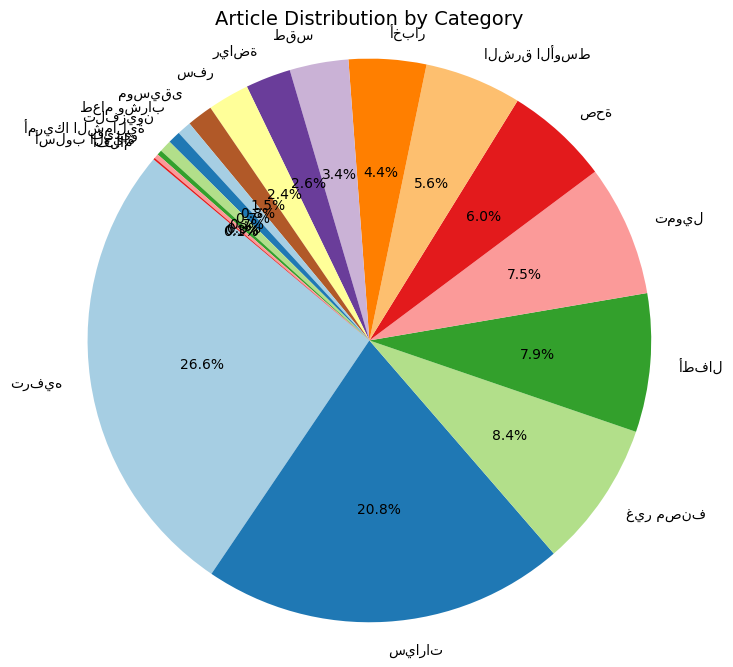

In [ ]:
# Plotting the distribution of articles across categories as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Article Distribution by Category', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

### Install Required Libraries

In [ ]:
pip install transformers torch arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=e7f766ac025305ad13e565bce39602250d94a52194dafe3b6080c037436ca60c
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
Successfully built emoji
